<a href="https://colab.research.google.com/github/pitaconsumer/pitaconsumer.github.io./blob/master/MQ_Assessment_Company_Matches_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assessment of Company Applicant Matches With Startups

**Exploration Questions**
1. What patterns do you see in the data? What recommendations would you make to the business team
2. Given this limited data set, what companies appear to have a 
strong product-market fit with AngelList?
3. What insights would you recommend to the product team? 
4. Do you see any meaningful patterns in hiring decisions between companies of varying scale? Explain your reasoning. 
5. What additional information do you need to complete your analysis? 

** Assumptions for Approach**
1) B2B is not a market of its own because its product/service still fall into an industry or sector that wasn't entirely captured in the job_open data.
2) We are defining new graduates as those who graduated in 2018 and after because the pandemic year--graduates in 2020 and 2021 should be given a longer grace period since we hit a recession in a once in a hundred-years crisis. Some might refer to the socio-economic climate resulting from the pandemic as a 'Black Swan' event. 
3) The number of hired/placed applicants by market will address the product-market fit with AngelList.


#Summary
The strongest product-market fit with AngelList tend to be 'Education' and 'Mobile Commerce'. (I would argue that 'B2B' is a too broad.)  And these market companies fall into the 'Series B' round of funding.

The data hint at a few patterns. For example, the 'Series B' funded companies post the most roles. Also, we see that 'Seed' round funded companies present the most diverse salary ranges. The top posted roles are mostly 'Engineering' types:     Software Engineer        -    22
Product Designer         -    13
Senior Software Engineer -    9


However, 'Product Designer' could include some non-engineering skills that could fit a candidate profile in the business degree area. Coincidentally, ambgious degree types tended to be among the top matches with companies: Other                    26
Bachelor of Science      22
Bachelor of Arts         10


These were the top matched company roles among applicants: 
Developer                       230
Full Stack Developer             66
Designer                         42

Regarding location, we see that 'San Francisco' and 'New York' host the most opportunities. The most applicant matches with roles came from New York (130 candidate success matches) at double the rate of those candidates from San Francisco (51 candidate success matches).

Out of curiousity, I searched 'Austin' as the rising new tech hub. But the companies hiring for that location present hiring opportunities that represent less than 5 percent of the total postings. 

Regarding markets: 'Education' market leads with 187 company applicants. The second market, which is broader in scope, and paired with another market/sector, is the 'B2B', or Business to Business category at 169 company applicants. Technically, the second most popolar "market", or sector, is 'Mobile Commerce'. However, noting market popularity is linked to types of domain knowledge that would appeal to non-technical applicants, who apply for non-engineering roles (UI Designer), which may appeal to a Visual Arts or transitioning 'Product Designer' role.

AngelList's match success is represented by the 580 candidates who matched out of the pool of 8148 applicants. (I used applicant_id to determine universe.) Therefore, we see a 7 percent match success among our candidate users.  

#Recommendations
There is room for improvement to increase match rate by, perhaps, generating recommendations for "Apply" based on 'years of experience'. 

In addition, I would recommend the following:
* Product team: Recategorize the company market type, or forcing companies to select a secondary market when first choosing 'B2B'.

* Business Team: Boost roles that do not call for 'Coding' or any programming languages to those who graduated more recently because this appeals to more risk-taking cohorts who are more flexible on skills development and will not require pay veering towards 'maximum_salary'. 

* Data Team: Review those listing '10+' years of experience to see their hiring rate because seed companies post maximum salary given that they are filling in a high-profile role. For example applicant '24358' applied for a 'Developer' role with more than 10 years of experience, but didn't match. Are companies acquiring talent who tend to have higher years of experience?

Given more time, I would create a crosstab of the average salary across candidate roles that were filled. I would need data, such as the timestamp for when role was filled. Then I would extract the day from that column and from the current column 'application_timestamp' to calculate the difference. We would see how long the role remain open until hire and could then correlate that with average salary by role. Furthermore, we could check to see high likely the role locataion hired an applicant from his/her location. Ideally, business team would like to see the selected candidate matched and the likelihood the company is selecting strictly from its own location pool or hiring candidates regardless of applicant location--this would review the location bias element ('user'). If 'users' percieve that they only get hired if they live in that location, they are less likely to submit applications for roles that match his or her skills because 'location' becomes the determininng factor to hire by coompanies. 

Finally, I would build up a multivariable regression model from my simple model below using 'graduation_year' to predict whether the candidate matches, which showed a low coefficient...and requires more explanatory power. Building on this, I would like to predict 'match_with_company' but including additional feataures from our joined data set, like 'applicant_location', 'degree', and 'years_of_experience'. First I would conduct more pre-processing to categories. 

Specifically, I would use a multi-label encoder that recognizes the categories within the 'years_of_experience' and 'degree' columns so that they may included in our 'X_trained' and 'X_tested' data to review the potential influence these factors have on a successful candidate match. 

In [251]:
#calculate Match success from candidate pool from 2nd and 3rd sheets
580/8148 

0.07118311242022582

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #Use for binary variable labelencode = LabelEncoder()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Upload Excel file and Identify sheet names
file = '/content/Analysis Take-Home Data.xlsx'
angel = pd.ExcelFile(file)
print(angel.sheet_names)

['Job Openings ', 'Job Applications', 'Job Applicants']


In [7]:
#Review sheets
job_open = angel.parse('Job Openings ') # 1st sheet name, as a string
job_open.head()

,job_id,job_title,job_type,salary_range_min,salary_range_max,job_locations,job_role,company_id,company_markets,last_fundraising_date,last_fundraising_round
0,161152,Web Development Instructor,contract,70000.0,120000.0,San Francisco,Developer,87129,Education,2015-10-01,Series D
1,17573,UI designer,contract,40000.0,50000.0,New York City,Designer,95137,Education,NaT,NaN
2,197145,Senior Mobile Engineer,full-time,80000.0,135000.0,New York City,Developer,20873,Mobile Commerce,NaT,NaN
3,238153,Ruby on Rails Engineer,full-time,80000.0,110000.0,New York City,Developer,87129,Education,2015-10-01,Series D
4,335111,Full Stack Software Engineer,full-time,90000.0,140000.0,San Francisco,Developer,75887,Mobile Commerce,2014-12-14,Unknown


In [13]:
job_open.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   job_id                  434 non-null    int64         
 1   job_title               434 non-null    object        
 2   job_type                434 non-null    object        
 3   salary_range_min        293 non-null    float64       
 4   salary_range_max        296 non-null    float64       
 5   job_locations           434 non-null    object        
 6   job_role                434 non-null    object        
 7   company_id              434 non-null    int64         
 8   company_markets         434 non-null    object        
 9   last_fundraising_date   187 non-null    datetime64[ns]
 10  last_fundraising_round  185 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 37.4+ KB



*  Job info = 'job_title', 'job_type', 'job_role', 'job_locations', 'salary_range_min': We have details about the job posting, like the salary info. And the same job_id listed in applicaation sheet 

*  Company info = 'company_id', 'company_markets': We have the markets/sectors that company is targeting. We have 

*  'last_fundraising_date': We have a timestamp data type that identifies when they last raised funds. 
* 'last_fundraising_round': We have partial info on the type of round that company application considered for funds.

In [24]:
job_open.describe()

,job_id,salary_range_min,salary_range_max,company_id
count,4.340000e+02,293.000000,296.000000,434.000000
mean,7.704027e+05,75385.665529,107858.108108,58685.942396
std,1.157326e+06,43874.330959,60684.793855,24311.973450
min,1.757300e+04,0.000000,0.000000,10455.000000
25%,3.928542e+05,50000.000000,70000.000000,40947.000000
50%,5.637705e+05,80000.000000,120000.000000,59126.000000
75%,6.514368e+05,100000.000000,150000.000000,79628.000000
max,6.751011e+06,180000.000000,250000.000000,99956.000000


In [25]:
#Take the mean of the mean-minimum and mean-maximum to determine the overall mean
(75385+107858)/2

91621.5

*Salary:*

We see that the mean salary advertised is $91,621.50. However, it would be useful to have a breakdown of salary by role: identify the salary statistics for each role advertised.

In [21]:

job_open.value_counts()

job_id   job_title                                         job_type    salary_range_min  salary_range_max  job_locations                job_role   company_id  company_markets  last_fundraising_date  last_fundraising_round
6751011  Marketing Designer                                full-time   40000.0           80000.0           San Francisco                Designer   47044       B2B              2019-04-17             Series A                  1
496622   Senior Backend Engineer: Learner Experience Team  full-time   150000.0          175000.0          New York City                Developer  99566       Education        2016-07-12             Series C                  1
325417   Software Engineer                                 full-time   110000.0          140000.0          New York City,San Francisco  Developer  87129       Education        2015-10-01             Series D                  1
335111   Full Stack Software Engineer                      full-time   90000.0           140000.0

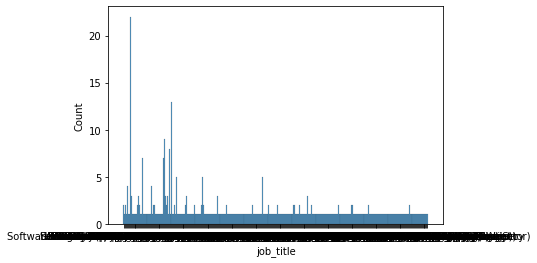

In [243]:
#Visualize job title
sns.histplot(data=job_open, x="job_title")
plt.show()

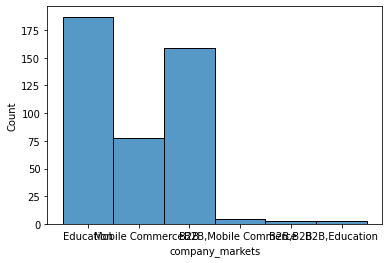

In [244]:
#Visualize markets
sns.histplot(data=job_open, x="company_markets")
plt.show()

In [197]:
job_open.value_counts('company_id')

company_id
81716    11
73216    11
81411     8
42248     8
87129     7
         ..
65892     1
65647     1
65596     1
64638     1
10455     1
Length: 219, dtype: int64

Companies '81716' and '73216' posted the most jobs: 11. Companies '81411'and
'42248' each posted 8. Let's see what type of fund group they sit it.

The data show these 4 top posting companies are either 'Series B' or 'Series C' funded rounds. Mostly, they represent 'Series B' funded rounds.

In [201]:
job_open[job_open['company_id'] == 81716]


,job_id,job_title,job_type,salary_range_min,salary_range_max,job_locations,job_role,company_id,company_markets,last_fundraising_date,last_fundraising_round
101,369940,Senior Platform Engineer,full-time,100000.0,180000.0,San Francisco,Developer,81716,B2B,2017-11-06,Series B
102,369946,Senior Backend/Application Engineer,full-time,100000.0,180000.0,San Francisco,Developer,81716,B2B,2017-11-06,Series B
103,369947,Infrastructure Engineer,full-time,100000.0,180000.0,San Francisco,Developer,81716,B2B,2017-11-06,Series B
104,369948,Data Engineer,full-time,100000.0,180000.0,San Francisco,Developer,81716,B2B,2017-11-06,Series B
214,550710,Mobile Architect,full-time,150000.0,200000.0,San Francisco,Developer,81716,B2B,2017-11-06,Series B
220,559316,Graphic Designer,full-time,70000.0,120000.0,San Francisco,Designer,81716,B2B,2017-11-06,Series B
226,565339,Senior Front End Engineer,full-time,NaN,NaN,San Francisco,Developer,81716,B2B,2017-11-06,Series B
249,584431,Senior Android Engineer,full-time,NaN,NaN,San Francisco,Developer,81716,B2B,2017-11-06,Series B
254,586790,Senior iOS Engineer,full-time,NaN,NaN,San Francisco,Developer,81716,B2B,2017-11-06,Series B
288,619263,Senior Product Designer,full-time,NaN,NaN,San Francisco,Designer,81716,B2B,2017-11-06,Series B


In [202]:
job_open[job_open['company_id'] ==73216]

,job_id,job_title,job_type,salary_range_min,salary_range_max,job_locations,job_role,company_id,company_markets,last_fundraising_date,last_fundraising_round
17,970134,Partner Engineer,full-time,50000.0,130000.0,San Francisco,Developer,73216,Education,2014-12-16,Series B
159,475912,Software Engineering Intern,internship,NaN,NaN,San Francisco,Developer,73216,Education,2014-12-16,Series B
163,485492,Software Engineer - Security,full-time,NaN,NaN,San Francisco,Developer,73216,Education,2014-12-16,Series B
208,547959,Software Engineer - Secure Sync,full-time,NaN,NaN,San Francisco,Developer,73216,Education,2014-12-16,Series B
209,547960,Software Engineer - Instant Login,full-time,NaN,NaN,San Francisco,Developer,73216,Education,2014-12-16,Series B
210,547961,Software Engineer - Discovery,full-time,NaN,NaN,San Francisco,Developer,73216,Education,2014-12-16,Series B
211,547962,Software Engineer - Infrastructure,full-time,NaN,NaN,San Francisco,Developer,73216,Education,2014-12-16,Series B
212,547963,Software Engineer,full-time,NaN,NaN,San Francisco,Developer,73216,Education,2014-12-16,Series B
227,566370,Software Engineer - Data Engineering and Inter...,full-time,NaN,NaN,San Francisco,Developer,73216,Education,2014-12-16,Series B
311,629779,Brand Designer,full-time,NaN,NaN,San Francisco,Designer,73216,Education,2014-12-16,Series B


Both of the highest posted jobs by companies are 'Series B' funding types. 

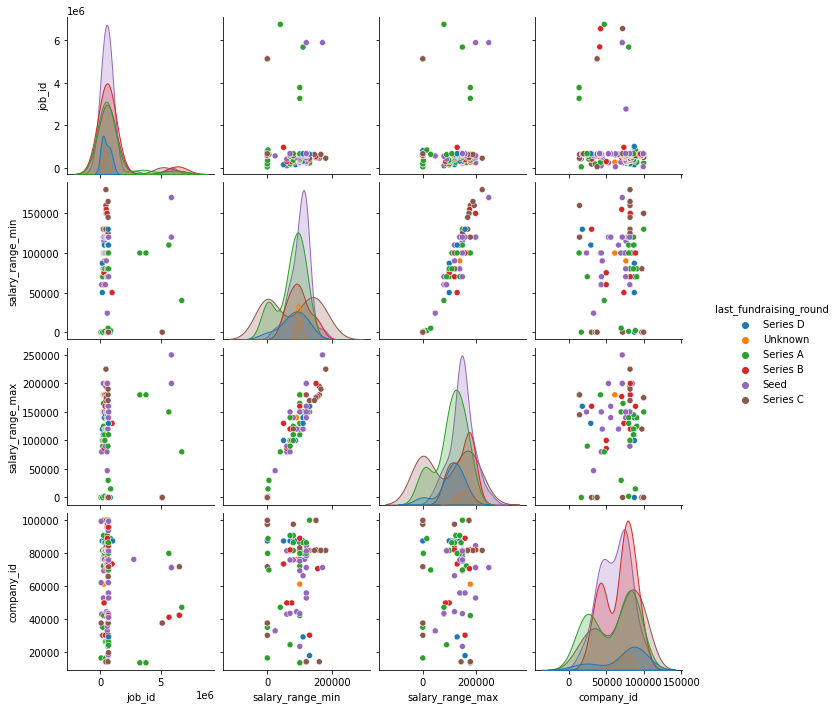

In [235]:
#Visualize the funding stage/round 
sns.pairplot(job_open,hue='last_fundraising_round')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

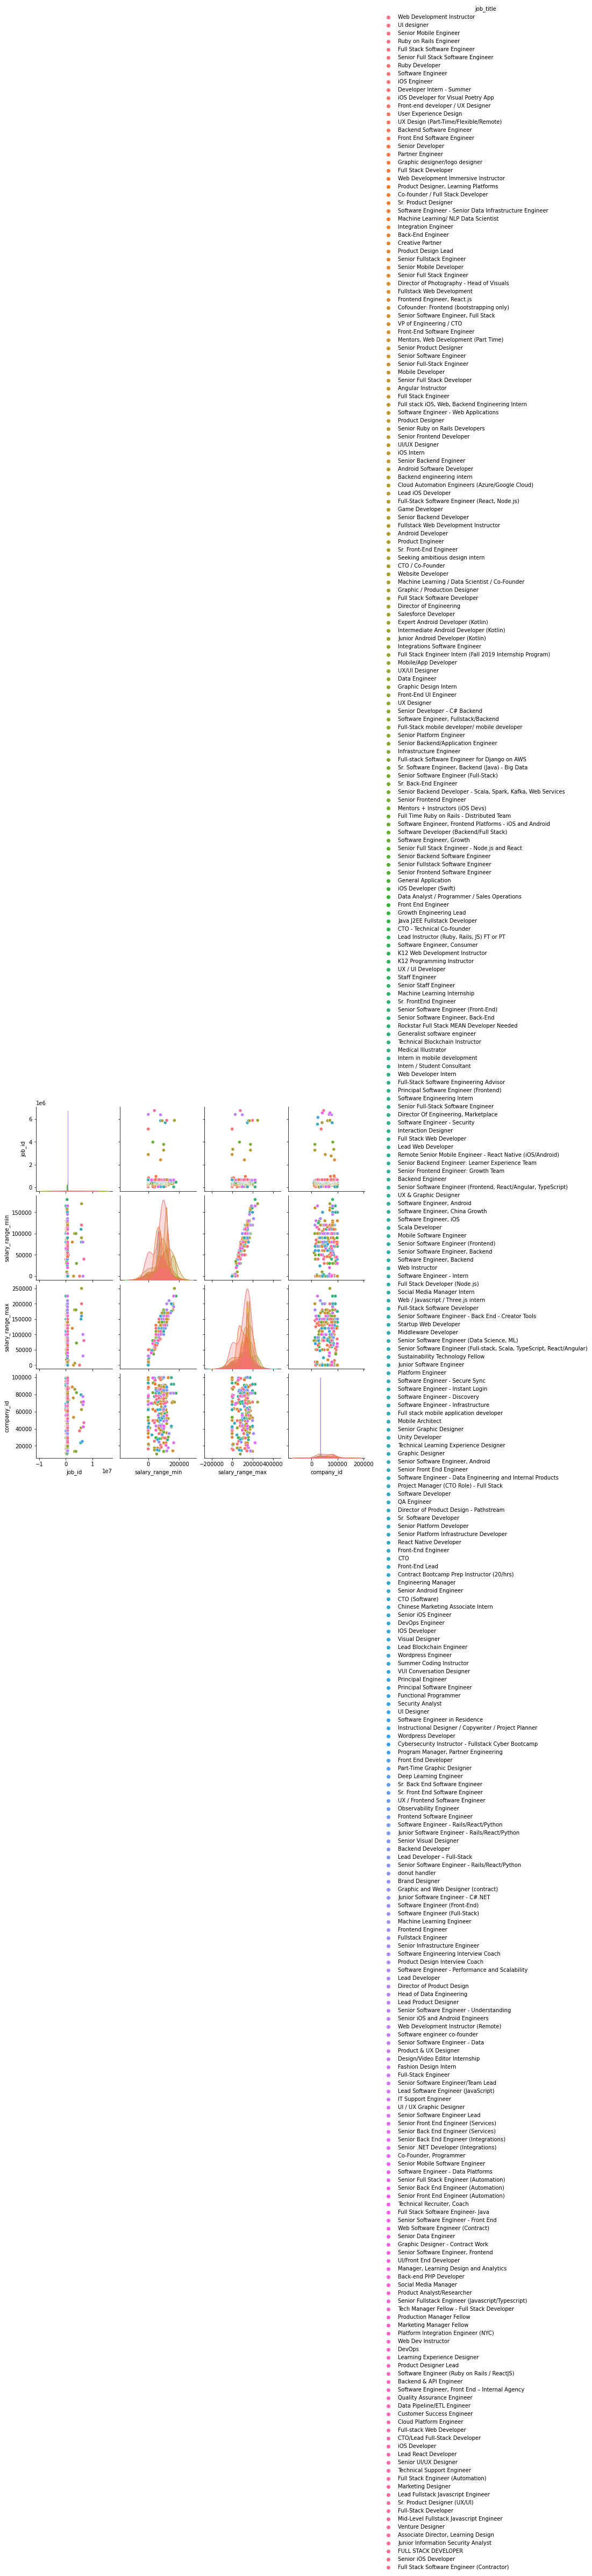

In [238]:
#Visualize 'job_title' 
sns.pairplot(job_open,hue='job_title')

In [203]:
#Posted second highest number of jobs: 8 '81411'and '42248'
job_open[job_open['company_id'] == 81411]

,job_id,job_title,job_type,salary_range_min,salary_range_max,job_locations,job_role,company_id,company_markets,last_fundraising_date,last_fundraising_round
142,459660,Senior Software Engineer,full-time,130000.0,170000.0,New York City,Developer,81411,Education,2017-05-24,Series C
143,459661,Staff Engineer,full-time,160000.0,195000.0,New York City,Developer,81411,Education,2017-05-24,Series C
144,459662,Senior Staff Engineer,full-time,180000.0,225000.0,New York City,Developer,81411,Education,2017-05-24,Series C
327,638459,Director of Product Design,full-time,165000.0,190000.0,New York City,Designer,81411,Education,2017-05-24,Series C
328,638464,Head of Data Engineering,full-time,NaN,NaN,New York City,Developer,81411,Education,2017-05-24,Series C
329,638476,Lead Product Designer,full-time,145000.0,170000.0,New York City,Designer,81411,Education,2017-05-24,Series C
330,638477,Senior Product Designer,full-time,125000.0,150000.0,New York City,Designer,81411,Education,2017-05-24,Series C
346,650657,IT Support Engineer,full-time,NaN,NaN,New York City,Developer,81411,Education,2017-05-24,Series C


In [204]:
job_open[job_open['company_id'] == 42248]

,job_id,job_title,job_type,salary_range_min,salary_range_max,job_locations,job_role,company_id,company_markets,last_fundraising_date,last_fundraising_round
349,651527,Senior Front End Engineer (Services),full-time,NaN,NaN,Toronto,Developer,42248,B2B,2018-10-31,Series B
350,651528,Senior Back End Engineer (Services),full-time,NaN,NaN,Toronto,Developer,42248,B2B,2018-10-31,Series B
351,651529,Senior Back End Engineer (Integrations),full-time,NaN,NaN,Toronto,Developer,42248,B2B,2018-10-31,Series B
352,651530,Senior .NET Developer (Integrations),full-time,NaN,NaN,Toronto,Developer,42248,B2B,2018-10-31,Series B
362,6551040,Senior Full Stack Engineer (Automation),full-time,NaN,NaN,Toronto,Developer,42248,B2B,2018-10-31,Series B
363,6551041,Senior Back End Engineer (Automation),full-time,NaN,NaN,Toronto,Developer,42248,B2B,2018-10-31,Series B
364,6551042,Senior Front End Engineer (Automation),full-time,NaN,NaN,Toronto,Developer,42248,B2B,2018-10-31,Series B
419,675261,Full Stack Engineer (Automation),full-time,NaN,NaN,Toronto,Developer,42248,B2B,2018-10-31,Series B


### Location

In [231]:
#What locations are popular?
job_open.value_counts('job_locations')

job_locations
San Francisco                  193
New York City                  148
Toronto                         59
New York City,San Francisco     16
Austin                          16
Austin,San Francisco             1
Austin,New York City             1
dtype: int64

### Location
Where's rising star of Austin on the list of hiring locations?


In [32]:
#Where's rising star of Austin on the list of hiring locations?
austin = job_open[job_open['job_locations']== 'Austin']
print(austin)

     job_id  ... last_fundraising_round
20   156432  ...               Series D
34   235252  ...                    NaN
37   245174  ...                    NaN
78   333731  ...                    NaN
106  373274  ...                    NaN
130  436296  ...                    NaN
137  449880  ...                    NaN
138  450234  ...                    NaN
153  472254  ...                    NaN
167  491258  ...                    NaN
182  511595  ...                    NaN
206  543976  ...                    NaN
304  627250  ...                    NaN
348  651166  ...                    NaN
386  666636  ...                    NaN
408  672817  ...                    NaN

[16 rows x 11 columns]


In [247]:
#Percent of Austin opportunities out of entire sample
18/(18+193+148+59+16)


0.041474654377880185

### Observation:
We see that Austin job posting is from a known 'Series D' funded round...pretty advanced. But not enough data based on "NaN" values to conjecture.

In [33]:
#Dual location listings
austin = job_open['job_locations'][(job_open['job_locations'] == 'Austin') & (job_open['job_locations'] =='Austin,San Francisco')]
austin

Series([], Name: job_locations, dtype: object)

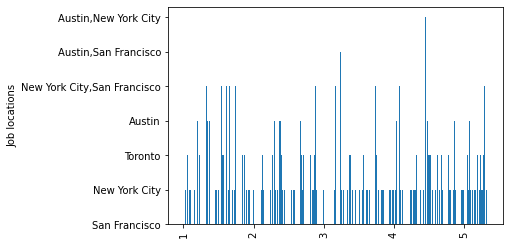

In [35]:
#Visualize job location
fig, ax = plt.subplots()

# Plot a bar-chart of jobs as a function of location
ax.bar(job_open.index,job_open['job_locations'])

# Set the x-axis tick labels to the city location
ax.set_xticklabels(job_open.index, rotation =90)

# Set the y-axis label
ax.set_ylabel('Job locations')

plt.show()

In [208]:
#What markets are popular?
job_open.value_counts('company_markets')


company_markets
Education              187
B2B                    159
Mobile Commerce         78
B2B,Mobile Commerce      4
B2B,Education            3
B2B,B2B                  3
dtype: int64

In [212]:
job_open.company_markets.unique()

array(['Education', 'Mobile Commerce', 'B2B', 'B2B,Mobile Commerce',
       'B2B,B2B', 'B2B,Education'], dtype=object)

In [210]:
# iterating over and calling 
# tolist() method for 
# each column
for i in list(job_open):
    
    # show the list of values  
    print(job_open[i].tolist())

[161152, 17573, 197145, 238153, 335111, 352119, 503148, 526146, 526150, 53069, 662106, 67388, 817127, 847154, 88466, 92370, 92558, 970134, 1013140, 103558, 156432, 156600, 160475, 180248, 182799, 192586, 194874, 195228, 195235, 199259, 212647, 232545, 233665, 235197, 235252, 2421014, 244125, 245174, 245611, 246828, 251664, 253880, 254792, 255747, 259818, 262693, 263596, 264637, 267938, 269123, 270799, 273893, 274422, 276451, 2771003, 285217, 2891045, 292665, 292901, 294445, 294990, 295643, 298723, 298909, 299707, 306277, 306703, 307477, 308572, 308847, 309738, 309918, 313257, 313946, 315889, 325417, 327549, 3271001, 333731, 3351046, 337649, 337856, 338157, 341651, 341961, 342187, 350445, 351221, 351224, 351226, 352292, 359855, 360398, 361545, 361592, 36295, 363147, 366171, 368106, 368666, 368993, 369940, 369946, 369947, 369948, 372433, 373274, 375523, 377832, 3781054, 379420, 390467, 392239, 394700, 3981019, 408336, 415789, 416257, 416410, 419109, 419116, 419124, 422272, 422574, 426597

In [228]:
#Apply multi label to markets
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
#mlb.fit([['sci-fi', 'thriller', 'comedy']])
mlb.fit([['Education','B2B','Mobile Commerce','B2B,Mobile Commerce','B2B,Education',
                                              'B2B,B2B']])
MultiLabelBinarizer()
mlb.classes_


array(['B2B', 'B2B,B2B', 'B2B,Education', 'B2B,Mobile Commerce',
       'Education', 'Mobile Commerce'], dtype=object)

In [ ]:
#obj_df["body_style"] = obj_df[""].astype('category')
#obj_df.dtypes

In [19]:
#B2B appears in a few value pairings. Sum them.
159+4+3+3

169

In [196]:
job_open.value_counts('job_title').head(50)

job_title
Software Engineer                                 22
Product Designer                                  13
Senior Software Engineer                           9
Full Stack Engineer                                8
Senior Product Designer                            7
Full Stack Developer                               7
Senior Backend Engineer                            5
Data Engineer                                      5
Backend Engineer                                   5
Product Design Lead                                4
Full Stack Software Engineer                       4
Product Engineer                                   3
CTO                                                3
iOS Engineer                                       3
Senior Full Stack Developer                        3
Senior Frontend Engineer                           3
Front End Software Engineer                        3
Senior Full-Stack Engineer                         3
Frontend Engineer                   

#Multi lable issue
#dataset = MultiColumnLabelEncoder(columns = ["local", "animals", "local", "diet", "food", "health", "local", "police brutality", "police", "kids", "dogs"]).fit_transform(dataset)
job_open = MultiColumnLabelEncoder(columns = ["Software Engineer", "Product Designer ", "Senior Software Engineer ", "Full Stack Engineer", "Senior Product Designer", 
                                              "Senior Software Engineer (Frontend, React/Angular, TypeScript)",
                                              "Senior Software Engineer (Full-Stack)", "Senior Software Engineer (Full-stack, Scala, TypeScript, React/Angular)",
                                              "Senior Software Engineer - Back End - Creator Tools", 
                                              "Remote Senior Mobile Engineer - React Native (iOS/Android)", 
                                              ""]).fit_transform(dataset)

In [234]:
job_open.columns

Index(['job_id', 'job_title', 'job_type', 'salary_range_min',
       'salary_range_max', 'job_locations', 'job_role', 'company_id',
       'company_markets', 'last_fundraising_date', 'last_fundraising_round'],
      dtype='object')

In [ ]:
#job_open['category_fund'] = job_open['last_fundraising_round'].astype('category')

In [237]:
#job_open["funding_cat"] = job_open["last_fundraising_round"].cat.codes
#job_open.head()

The leading market is 'Education' at 187 company applicants. The second market, which is broader in scope, and paired with another market/sector, is the 'B2B', or Business to Business category at 169 company applicants. Technically, the second most popolar "market", or sector, is 'Mobile Commerce'. However, noting market popularity is linked to types of domain knowledge that would appeal to non-technical applicants, who apply for non-engineering roles (UI Designer), which may appeal to a Visual Arts or transitioning 'Product Designer' role.

In [8]:
#What do the columns reveal from second sheet
application = angel.parse('Job Applications') # 2nd sheet name, as a string
application.head()



,job_id,applicant_id,application_timestamp,matched_with_company
0,274422,9047452,2019-01-01 01:26:00,0
1,294990,5636130,2019-01-01 01:27:00,1
2,199259,8725425,2019-01-01 02:15:00,0
3,434704,7845387,2019-01-01 03:01:00,0
4,481416,829518,2019-01-01 03:23:00,0


In [249]:
#Locate matched for successjob_open[job_open['company_id'] == 42248]
application[application['matched_with_company'] ==1]



,job_id,applicant_id,application_timestamp,matched_with_company
1,294990,5636130,2019-01-01 01:27:00,1
32,473717,7269222,2019-01-01 21:38:00,1
43,294990,8995722,2019-01-02 01:40:00,1
44,473717,8711917,2019-01-02 02:28:00,1
73,847154,4619333,2019-01-02 08:47:00,1
...,...,...,...,...
8094,528496,9387003,2019-02-28 19:57:00,1
8105,361545,8682241,2019-02-28 20:42:00,1
8114,308572,917370,2019-02-28 21:41:00,1
8116,262693,917370,2019-02-28 21:42:00,1


### Observation: Out of the total applicants, we have only 578 matches with a company. We need to review combined data set to identify other traits. 

['matched_with_company'] ==1]

In [14]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8136 entries, 0 to 8135
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_id                 8136 non-null   int64         
 1   applicant_id           8136 non-null   int64         
 2   application_timestamp  8136 non-null   datetime64[ns]
 3   matched_with_company   8136 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 254.4 KB


In [84]:
application.head

<bound method NDFrame.head of       job_id  applicant_id application_timestamp  matched_with_company
0     274422       9047452   2019-01-01 01:26:00                     0
1     294990       5636130   2019-01-01 01:27:00                     1
2     199259       8725425   2019-01-01 02:15:00                     0
3     434704       7845387   2019-01-01 03:01:00                     0
4     481416        829518   2019-01-01 03:23:00                     0
...      ...           ...                   ...                   ...
8131  461856       9233034   2019-02-28 23:09:00                     0
8132  459782       9123337   2019-02-28 23:21:00                     0
8133  536883       7659425   2019-02-28 23:32:00                     0
8134  474985       7509740   2019-02-28 23:41:00                     0
8135  274422       9418925   2019-02-28 23:57:00                     0

[8136 rows x 4 columns]>

*Application info:*

*   We have the same job_id and applicant_id (from candidate sheet)
*  Candidate info = 'matched_with_company': We have whether candidate matched with company as '0'1. There will be more demographic data needed, which is listed in 'candidate' data file.

*  'applicataion_timstamp': We have time submitted for application.

## Candidate

In [9]:
 candidate = angel.parse('Job Applicants') # 3rd sheet name, as a string
 candidate.head()


,applicant_id,applicant_role,years_of_experience,graduation_year,degree,applicant_location,applicant_skills,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,24358,Developer,10+,NaN,NaN,Silicon Valley,"Agile, Agile Software Development, Amazon Web ...",NaN,NaN,NaN,NaN
1,44261,Product Manager,6,2009.0,Master of Science,United States,"Business Development, Digital Marketing, E-Com...",NaN,NaN,NaN,NaN
2,45761,Developer,10+,NaN,NaN,New York City,"Architect, Billing, Coding, Equities, Equities...",NaN,NaN,NaN,NaN
3,16763,Developer,2,2005.0,NaN,Boston,"Amazon Web Services, Apache Hadoop, Asset Mana...",NaN,NaN,NaN,NaN
4,354103,Developer,10+,NaN,NaN,Moscow,"C#, Computer Vision, Machine Learning, Robotic...",NaN,NaN,NaN,NaN


In [15]:
candidate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   applicant_id         4773 non-null   int64  
 1   applicant_role       4773 non-null   object 
 2   years_of_experience  4722 non-null   object 
 3   graduation_year      4038 non-null   float64
 4   degree               499 non-null    object 
 5   applicant_location   4754 non-null   object 
 6   applicant_skills     4629 non-null   object 
 7   Unnamed: 7           1 non-null      object 
 8   Unnamed: 8           1 non-null      object 
 9   Unnamed: 9           1 non-null      object 
 10  Unnamed: 10          1 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 410.3+ KB


In [30]:
#Explore descriptives for candidate
candidate.describe()


,applicant_id,graduation_year
count,4.773000e+03,4038.000000
mean,6.702450e+06,2017.877167
std,6.665797e+06,290.714976
min,1.519000e+04,1.000000
25%,2.666024e+06,2013.000000
50%,7.889256e+06,2016.000000
75%,9.103857e+06,2018.000000
max,9.391000e+07,20152.000000


In [59]:
candidate.value_counts('years_of_experience')
#Drop 10 yrs of experience values

years_of_experience
0      963
2      711
1      657
3      546
10+    544
4      352
5      342
6      209
7      173
8      151
9       74
dtype: int64

In [11]:
# get names of indexes for which
# column Age has value 21
#index_names = df[ df['Age'] == 21 ].index

index_names = candidate[candidate['years_of_experience'] == '10+'].index
print(index_names)

Int64Index([   0,    2,    4,    6,    8,   10,   12,   13,   14,   17,
            ...
            4673, 4688, 4693, 4695, 4730, 4744, 4756, 4757, 4768, 4771],
           dtype='int64', length=544)


In [12]:
## drop these row indexes from candidate dataFrame
candidate.drop(index_names, inplace = True)
  
candidate
#Check if '10+' dropped in value_counts

,applicant_id,applicant_role,years_of_experience,graduation_year,degree,applicant_location,applicant_skills,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
1,44261,Product Manager,6,2009.0,Master of Science,United States,"Business Development, Digital Marketing, E-Com...",NaN,NaN,NaN,NaN
3,16763,Developer,2,2005.0,NaN,Boston,"Amazon Web Services, Apache Hadoop, Asset Mana...",NaN,NaN,NaN,NaN
5,408102,Full Stack Developer,2,2015.0,Bachelor's Degree,Shiraz,"Angular.JS, C++, Node.js, Product Development,...",NaN,NaN,NaN,NaN
7,464138,Developer,8,NaN,NaN,Barcelona,"Android Design, Angular.JS, CSS, Haml, HTML, i...",NaN,NaN,NaN,NaN
9,620115,Developer,2,2012.0,NaN,San Francisco,"Amazon Web Services, AngularJS, Business Devel...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4766,9422801,Frontend Developer,0,2012.0,NaN,Lima,"Bootstrap, Cascading Style Sheet (CSS), CSS, D...",NaN,NaN,NaN,NaN
4767,9423263,Developer,0,2021.0,NaN,Orange County,"3D Modeling, Adobe After Effects, Adobe Premie...",NaN,NaN,NaN,NaN
4769,9423894,Creative Director,4,2017.0,NaN,West Covina,"Bilingual, English language, Microsoft, Micros...",NaN,NaN,NaN,NaN
4770,9426025,Data Scientist,2,2015.0,NaN,Bryan,"Inventory, Management, Medical, Microsoft, Mic...",NaN,NaN,NaN,NaN


In [67]:
candidate.value_counts('years_of_experience')

years_of_experience
0    963
2    711
1    657
3    546
4    352
5    342
6    209
7    173
8    151
9     74
dtype: int64

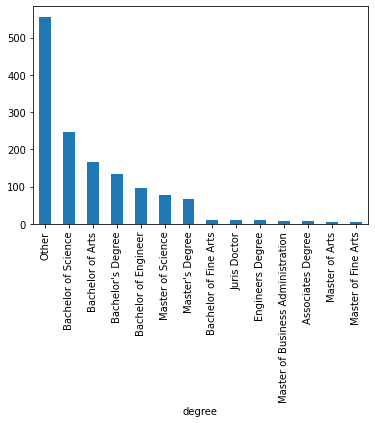

In [13]:
#Visualize 'degree'
candidate.groupby('degree')['years_of_experience'].sum().sort_values(ascending=False).plot(kind='bar')

In [14]:
#Breakdown 'degree' by 'years_of_experience'
pd.crosstab(index=candidate['degree'], columns=candidate['years_of_experience'])

years_of_experience,0,1,2,3,4,5,6,7,8,9
degree,,,,,,,,,,
Associates Degree,0,0,1,0,0,1,0,0,0,0
Bachelor of Arts,6,5,13,7,6,6,4,5,0,0
Bachelor of Engineer,5,3,7,6,8,3,0,1,1,0
Bachelor of Fine Arts,0,0,0,1,0,0,0,0,1,0
Bachelor of Science,13,5,20,17,10,8,3,3,4,0
Bachelor's Degree,1,0,5,7,4,4,3,1,4,1
Engineers Degree,0,0,1,0,2,0,0,0,0,0
Juris Doctor,0,0,1,0,0,0,0,0,1,0
Master of Arts,0,1,0,0,0,1,0,0,0,0


In [16]:
#Breakdown 'applicant skills' by 'years_of_experience'
pd.crosstab(index=candidate['applicant_skills'], columns=candidate['years_of_experience'])

years_of_experience,0,1,2,3,4,5,6,7,8,9
applicant_skills,,,,,,,,,,
"(Corporate) Social Responsibility and Sustainability topics, Activism, Adobe Photoshop, Advocacy, Attention to Detail, Corporate Social Responsibility, Drawing and Painting, Emotional Intelligence, Focus, Google Apps, Government Relations, Graphic Design, Highly Organized, Human Rights, Integrity, Liberal Arts, Management, Microsoft, Microsoft Excel, Microsoft Word, Non-Profit Experience, Nonprofit Organization Management, Perseverence and Adaptabilty, Photography, Political Campaigns, Political Lobbying and Influencing, Political Science, Politics, Research, Social Activist, Social Media, Socioeconomic and Political Research, Speech Writing, Time Management, United Nations",0,0,0,0,0,1,0,0,0,0
".NET Core, .NET Framework, Ability to work under pressures, Able to work with minimal supervision, Acceptance testing, Agile, Android Studio, Ant, ASP.Net WebForms, Bamboo, Bash, Bitbucket, Blackberry Enterprise Server, Bootstrap, C#, Communication Skills, Computer Troubleshooting, Confluence, CSS, Dreamweaver, Eclipse, English language, French language, Greek language, Highly Organized, HTML, Integration Testing, Interpersonal Skills, Java, Java Collections Framework, Javascript, Jenkins, Jira, jQuery, JUNIT, Jython, Linux, Lucidchart, Mac OS X, Maven, Microsoft .NET, Microsoft Unity Container, Microsoft Visual Studio, MS SQL Server, Mvc, Node.js, Notepad++, Oracle, Oracle Fusion Middleware, PHP, PHPStorm, Problem Solving, Python, Redgate, Resharper, RESTful Services, Shell Scripting, SOAP/REST (Web Services), SourceTree, SQL, Subversion, Team Player, Test Driven Development, TFS, Tortoise SVN, Unit Testing, Weblogic, WebStorm, Windows XP/7/8/10, Wordpress, XML, xunit",1,0,0,0,0,0,0,0,0,0
".NET Core, .NET WebAPI, AngularJS, Azure Functions, C#, Design Patterns, Docker, Git, Integration Testing, jQuery, Less CSS, Linux, Microsoft .NET, Microsoft Azure, MS SQL Server, Neo4J, R, REST, SCSS / SASS, TDD, TypeScript, Unit Testing",0,0,0,0,0,0,0,0,1,0
".NET Core, Actor, Agile, Angular, Architect, ASP.NET, C#, Coding, CQRS, DDD, Design Patterns, Distributed Systems, Docker, Event Sourcing, F#, Go, HTTPS, Java, Javascript, Kanban, Load Balancing, Load Testing, N-Tier Architecture, Object Oriented Programming, Oracle, Programming, Python, Realtime, Scala, Scalability, SCRUM, Service Oriented Architecture (SOA), Software Design, SOLID, SQL",0,0,0,0,0,0,0,1,0,0
".NET Core, AngularJS, Bootstrap, C#, CSS, Entity Framework, HTML, Javascript, jQuery, Microsoft .NET, MSSQL, Mvc, PostgreSQL, ReactJS, Redis, SQL, Swagger",0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
"iOS Development, Management, Mobile, Objective-C, React Native, React.js, Swift",0,0,0,1,0,0,0,0,0,0
"iOS Development, Mobile Development, Objective-C, Research, Software, Software Architecture, Swift, Web Development, Xcode",0,0,0,1,0,0,0,0,0,0
"iOS Development, Mobile Development, Objective-C, Swift",0,0,0,0,0,1,0,0,0,0


In [60]:
candidate.years_of_experience.dtype

dtype('O')

In [55]:
#Drop the 544 records of 10+ years experience



101


In [ ]:
#Number of candidates before

### Candidate observation
We see that the average candidate application's graduation year is 2017. Fifty percent of the candidates applying to AngelList postings graduated before 2016--over five years ago. Twenty-five percent of the candidates applying are new graduates--in 2018 or after. 

In [27]:
candidate.value_counts('degree')

degree
Other                                186
Bachelor of Science                  100
Bachelor of Arts                      68
Bachelor of Engineer                  37
Bachelor's Degree                     35
Master of Science                     27
Master's Degree                       24
Engineers Degree                       5
Bachelor of Fine Arts                  4
Associates Degree                      4
Master of Arts                         3
Master of Fine Arts                    2
Master of Business Administration      2
Juris Doctor                           2
dtype: int64

In [ ]:
#Visualize the degree plotted against hired


## Skills:
How do applicant skills overlay with company requested skills? 

We could join the application data file with the candidate data file on 'applicant_id' column to:
a) explore the relationship between candidates' background;
b) track how 'matched_with_company' among successful candidates to 
determine which traits are most in demand. 

In [28]:
#What are the most popular skills brought by applicants? 
candidate.value_counts('applicant_skills')

applicant_skills
Research                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      2
Adobe Illustrator, Adobe InDesign, Adobe Photoshop                                                                                                                                                                                                                                                     

In [43]:
#find() method applicant_skills = coding


# first occurance of 'oding'(case sensitive for 'Coding')
#result =candidate['applicant_skills'].find('oding')
#print("Substring 'oding':", result)


In [42]:
#Search for 'coding'
candidate.loc[candidate.applicant_skills.str.contains("oding", na=False)]

,applicant_id,applicant_role,years_of_experience,graduation_year,degree,applicant_location,applicant_skills,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
2,45761,Developer,10+,NaN,NaN,New York City,"Architect, Billing, Coding, Equities, Equities...",NaN,NaN,NaN,NaN
30,191641,CTO,7,2005.0,NaN,Bengaluru,"Active Listening, Agile, agile methodologies ,...",NaN,NaN,NaN,NaN
47,249561,Project Manager,6,NaN,NaN,Scottsdale,"agile methodologies , Agile methodology, Apple...",NaN,NaN,NaN,NaN
61,286260,CTO,5,2011.0,Other,San Ramon,"Accounting, Advertising, Agile, AJAX, Amazon W...",NaN,NaN,NaN,NaN
69,314707,CEO,10+,NaN,NaN,Los Angeles,"Amazon Web Services, Automation, Bash, Coding,...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4731,9411546,Designer,3,2016.0,NaN,New York City,"best practices, Cascading Style Sheet (CSS), C...",NaN,NaN,NaN,NaN
4752,9417157,Developer,9,NaN,NaN,Bengaluru,"Agile, Agile Software Development, Amazon Web ...",NaN,NaN,NaN,NaN
4760,9419919,Developer,3,NaN,NaN,Mumbai,"Android, Android Application Development, Appl...",NaN,NaN,NaN,NaN
4767,9423263,Developer,0,2021.0,NaN,Orange County,"3D Modeling, Adobe After Effects, Adobe Premie...",NaN,NaN,NaN,NaN


### Observation:

We see that 'coding'/'Coding' skill is claimed by 448  out of the 4773 individual candidates. 

In [17]:
#Wrangle a Small, Clean candiate data set with no null values
##Drop unnecessary column, like 'CustomerID' for easier processing of prediction modeling or  KMeans clustering
candidate_clean= candidate.drop(['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'], axis=1)
candidate_clean

,applicant_id,applicant_role,years_of_experience,graduation_year,degree,applicant_location,applicant_skills
1,44261,Product Manager,6,2009.0,Master of Science,United States,"Business Development, Digital Marketing, E-Com..."
3,16763,Developer,2,2005.0,NaN,Boston,"Amazon Web Services, Apache Hadoop, Asset Mana..."
5,408102,Full Stack Developer,2,2015.0,Bachelor's Degree,Shiraz,"Angular.JS, C++, Node.js, Product Development,..."
7,464138,Developer,8,NaN,NaN,Barcelona,"Android Design, Angular.JS, CSS, Haml, HTML, i..."
9,620115,Developer,2,2012.0,NaN,San Francisco,"Amazon Web Services, AngularJS, Business Devel..."
...,...,...,...,...,...,...,...
4766,9422801,Frontend Developer,0,2012.0,NaN,Lima,"Bootstrap, Cascading Style Sheet (CSS), CSS, D..."
4767,9423263,Developer,0,2021.0,NaN,Orange County,"3D Modeling, Adobe After Effects, Adobe Premie..."
4769,9423894,Creative Director,4,2017.0,NaN,West Covina,"Bilingual, English language, Microsoft, Micros..."
4770,9426025,Data Scientist,2,2015.0,NaN,Bryan,"Inventory, Management, Medical, Microsoft, Mic..."


In [78]:
candidate_clean.applicant_id.dtype

dtype('int64')

In [79]:
#candidate_clean.loc['applicant_id'== '']
candidate_clean[candidate_clean.values== 24358]

,applicant_id,applicant_role,years_of_experience,graduation_year,degree,applicant_location,applicant_skills
0,24358,Developer,10+,NaN,NaN,Silicon Valley,"Agile, Agile Software Development, Amazon Web ..."


In [87]:
candidate_clean.columns
#7 columns 'job_id',  'application_timestamp','matched_with_company'

Index(['applicant_id', 'applicant_role', 'years_of_experience',
       'graduation_year', 'degree', 'applicant_location', 'applicant_skills'],
      dtype='object')

In [18]:
#Don't Stack the 'application'df and 'candidate' df; rather Join on common unique identifier

joined_inner = pd.merge(left=application, right=candidate_clean, left_on='applicant_id', right_on='applicant_id')
joined_inner.shape
joined_inner

,job_id,applicant_id,application_timestamp,matched_with_company,applicant_role,years_of_experience,graduation_year,degree,applicant_location,applicant_skills
0,274422,9047452,2019-01-01 01:26:00,0,Developer,1,2018.0,NaN,Seattle,"AngularJS, Bash, Bootstrap, C++, Docker, E-Com..."
1,294990,5636130,2019-01-01 01:27:00,1,Developer,2,2020.0,NaN,New York City,"Alloy, AngularJS, C#, Django, Docker / Docker ..."
2,359855,5636130,2019-01-09 22:35:00,0,Developer,2,2020.0,NaN,New York City,"Alloy, AngularJS, C#, Django, Docker / Docker ..."
3,199259,8725425,2019-01-01 02:15:00,0,Project Manager,2,2010.0,NaN,Los Angeles,"Account Management, Language Skills, Managemen..."
4,199259,8725425,2019-01-22 19:14:00,0,Project Manager,2,2010.0,NaN,Los Angeles,"Account Management, Language Skills, Managemen..."
...,...,...,...,...,...,...,...,...,...,...
7237,341651,6833590,2019-02-28 23:02:00,1,Designer,2,2018.0,NaN,Chicago,"Adobe Illustrator, Adobe InDesign, Adobe Photo..."
7238,361545,9292508,2019-02-28 23:06:00,0,Product Manager,NaN,2012.0,NaN,New York City,"A/B Testing, Adobe Photoshop, Agile, Informati..."
7239,536883,7659425,2019-02-28 23:32:00,0,Developer,0,2017.0,NaN,Bengaluru,"Amazon Web Services, Bootstrap, Cascading Styl..."
7240,474985,7509740,2019-02-28 23:41:00,0,Full Stack Developer,7,2013.0,NaN,Nigeria,"Accounting, AJAX, Android Application Developm..."


In [89]:
joined_inner.columns

#3 columns added to candidate_cleaned to inform 'applicant_id' column on 

Index(['job_id', 'applicant_id', 'application_timestamp',
       'matched_with_company', 'applicant_role', 'years_of_experience',
       'graduation_year', 'degree', 'applicant_location', 'applicant_skills'],
      dtype='object')

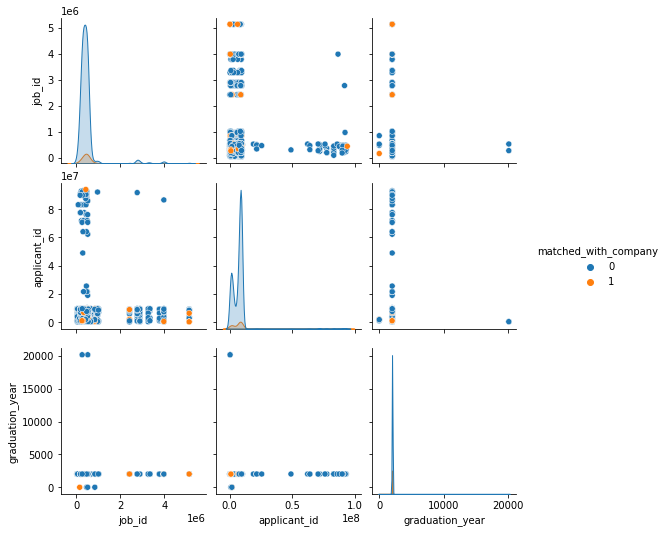

In [179]:
#Visualize pairplot of matched
sns.pairplot(joined_inner,hue='matched_with_company')

### Observation: We see that orange dots represent those applicants successfully matched with the company posting. 

In [21]:
#Breakdown 'applicant skills' by 'matched_with_company'
pd.crosstab(index=joined_inner['applicant_skills'], columns=joined_inner['matched_with_company'])

matched_with_company,0,1
applicant_skills,,
"(Corporate) Social Responsibility and Sustainability topics, Activism, Adobe Photoshop, Advocacy, Attention to Detail, Corporate Social Responsibility, Drawing and Painting, Emotional Intelligence, Focus, Google Apps, Government Relations, Graphic Design, Highly Organized, Human Rights, Integrity, Liberal Arts, Management, Microsoft, Microsoft Excel, Microsoft Word, Non-Profit Experience, Nonprofit Organization Management, Perseverence and Adaptabilty, Photography, Political Campaigns, Political Lobbying and Influencing, Political Science, Politics, Research, Social Activist, Social Media, Socioeconomic and Political Research, Speech Writing, Time Management, United Nations",2,0
".NET Core, .NET Framework, Ability to work under pressures, Able to work with minimal supervision, Acceptance testing, Agile, Android Studio, Ant, ASP.Net WebForms, Bamboo, Bash, Bitbucket, Blackberry Enterprise Server, Bootstrap, C#, Communication Skills, Computer Troubleshooting, Confluence, CSS, Dreamweaver, Eclipse, English language, French language, Greek language, Highly Organized, HTML, Integration Testing, Interpersonal Skills, Java, Java Collections Framework, Javascript, Jenkins, Jira, jQuery, JUNIT, Jython, Linux, Lucidchart, Mac OS X, Maven, Microsoft .NET, Microsoft Unity Container, Microsoft Visual Studio, MS SQL Server, Mvc, Node.js, Notepad++, Oracle, Oracle Fusion Middleware, PHP, PHPStorm, Problem Solving, Python, Redgate, Resharper, RESTful Services, Shell Scripting, SOAP/REST (Web Services), SourceTree, SQL, Subversion, Team Player, Test Driven Development, TFS, Tortoise SVN, Unit Testing, Weblogic, WebStorm, Windows XP/7/8/10, Wordpress, XML, xunit",0,1
".NET Core, .NET WebAPI, AngularJS, Azure Functions, C#, Design Patterns, Docker, Git, Integration Testing, jQuery, Less CSS, Linux, Microsoft .NET, Microsoft Azure, MS SQL Server, Neo4J, R, REST, SCSS / SASS, TDD, TypeScript, Unit Testing",1,0
".NET Core, Actor, Agile, Angular, Architect, ASP.NET, C#, Coding, CQRS, DDD, Design Patterns, Distributed Systems, Docker, Event Sourcing, F#, Go, HTTPS, Java, Javascript, Kanban, Load Balancing, Load Testing, N-Tier Architecture, Object Oriented Programming, Oracle, Programming, Python, Realtime, Scala, Scalability, SCRUM, Service Oriented Architecture (SOA), Software Design, SOLID, SQL",3,0
".NET Core, AngularJS, Bootstrap, C#, CSS, Entity Framework, HTML, Javascript, jQuery, Microsoft .NET, MSSQL, Mvc, PostgreSQL, ReactJS, Redis, SQL, Swagger",1,0
...,...,...
"iOS Development, Management, Mobile, Objective-C, React Native, React.js, Swift",2,0
"iOS Development, Mobile Development, Objective-C, Research, Software, Software Architecture, Swift, Web Development, Xcode",0,1
"iOS Development, Mobile Development, Objective-C, Swift",8,0


In [22]:
#Breakdown 'years_of_experience' by 'matched_with_company'
pd.crosstab(index=joined_inner['years_of_experience'], columns=joined_inner['matched_with_company'])

matched_with_company,0,1
years_of_experience,,
0,1499,112
1,1073,75
2,1207,99
3,770,65
4,490,46
5,574,41
6,351,25
7,311,23
8,266,14


### Observation: We almost see an inverse relationship: The more years of experience, the lower matched with company counts. Matched applicants skew towards less years of experience: the 0-3 years.

In [80]:
joined_inner[joined_inner.values== 24358]

,job_id,applicant_id,application_timestamp,matched_with_company,applicant_role,years_of_experience,graduation_year,degree,applicant_location,applicant_skills
3570,505943,24358,2019-01-21 22:39:00,0,Developer,10+,NaN,NaN,Silicon Valley,"Agile, Agile Software Development, Amazon Web ..."


In [83]:
#Check if joined differs from concatenate to ensure non duplicates of applicant_id
#Number of merged records should not be exact addition of both data sets if common column shared
#merged is 8,148 while canddiate_cleaned is 4,773. application = 8,136

8148-4773


3375

In [254]:
joined_inner[joined_inner['matched_with_company'] ==1]

,job_id,applicant_id,application_timestamp,matched_with_company,applicant_role,years_of_experience,graduation_year,degree,applicant_location,applicant_skills
1,294990,5636130,2019-01-01 01:27:00,1,Developer,2,2020.0,NaN,New York City,"Alloy, AngularJS, C#, Django, Docker / Docker ..."
6,481416,7845387,2019-01-19 02:42:00,1,Full Stack Developer,5,2010.0,NaN,Silicon Valley,"Android, AngularJS, Bootstrap, CakePHP, Codeig..."
71,473717,7269222,2019-01-01 21:38:00,1,Mechanical Engineer,2,2017.0,NaN,California,"abaqus, Aerospace, Ansys, Ansys Fluent, Automa..."
85,285217,7899805,2019-01-05 08:15:00,1,Frontend Developer,1,2017.0,NaN,San Francisco,"Agile methodology, AJAX, Algorithms & Data Str..."
86,523108,7899805,2019-01-05 08:15:00,1,Frontend Developer,1,2017.0,NaN,San Francisco,"Agile methodology, AJAX, Algorithms & Data Str..."
...,...,...,...,...,...,...,...,...,...,...
8122,528496,9387003,2019-02-28 19:57:00,1,Content Creator,5,2016.0,NaN,Reno,"Adobe InDesign, Adobe Lightroom, Adobe Photosh..."
8128,361545,8682241,2019-02-28 20:42:00,1,Business Analyst,3,2016.0,NaN,New York City,"Agile, Business Development, Business Strategy..."
8135,308572,917370,2019-02-28 21:41:00,1,Developer,10+,2005.0,NaN,New York City,"Bootstrap, C#, C++, Django, Full Stack Develop..."
8136,262693,917370,2019-02-28 21:42:00,1,Developer,10+,2005.0,NaN,New York City,"Bootstrap, C#, C++, Django, Full Stack Develop..."


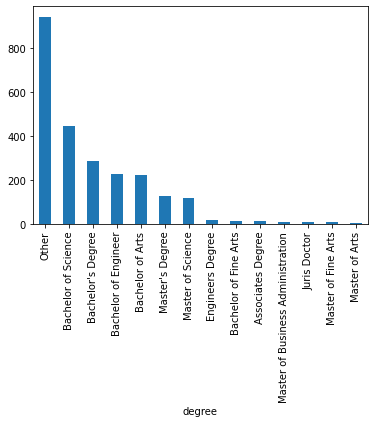

In [23]:
#Visualize 'years_of_experience'
joined_inner.groupby('degree')['years_of_experience'].sum().sort_values(ascending=False).plot(kind='bar')

In [252]:
joined_inner[joined_inner['matched_with_company'] ==1].value_counts('applicant_role')

applicant_role
Developer                       230
Full Stack Developer             66
Designer                         42
UI/UX Designer                   37
Mobile Developer                 29
Frontend Developer               27
Data Scientist                   18
Marketing                        15
Business Analyst                 11
Backend Developer                10
Content Creator                   8
Visual Designer                   7
Project Manager                   7
Product Manager                   7
Finance                           6
Human Resources                   5
Operations                        5
Creative Director                 4
Business Development              4
Operations Manager                4
Account Manager                   3
Systems Engineer                  3
Software Architect                3
CEO                               3
QA Engineer                       3
DevOps                            3
CTO                               3
Mechanical En

In [256]:
joined_inner[joined_inner['matched_with_company'] ==1].value_counts('applicant_location')

applicant_location
New York City     130
San Francisco      51
Toronto            33
New York           32
Los Angeles        20
                 ... 
Nigeria             1
Norman              1
North Carolina      1
Oregon              1
Abuja               1
Length: 164, dtype: int64

In [24]:
#Table of Matches broken down by types of degrees of applicant 
joined_inner.groupby(['degree','matched_with_company']).size()

degree                             matched_with_company
Associates Degree                  0                         3
                                   1                         1
Bachelor of Arts                   0                        80
                                   1                         8
Bachelor of Engineer               0                        78
Bachelor of Fine Arts              0                         3
                                   1                         1
Bachelor of Science                0                       138
                                   1                        15
Bachelor's Degree                  0                        69
                                   1                         6
Engineers Degree                   0                         5
Juris Doctor                       0                         2
Master of Arts                     0                         5
Master of Business Administration  0                         5

In [25]:
#Table of Matches broken down by applicant's years of experience 
joined_inner.groupby(['years_of_experience','matched_with_company']).size()

years_of_experience  matched_with_company
0                    0                       1499
                     1                        112
1                    0                       1073
                     1                         75
2                    0                       1207
                     1                         99
3                    0                        770
                     1                         65
4                    0                        490
                     1                         46
5                    0                        574
                     1                         41
6                    0                        351
                     1                         25
7                    0                        311
                     1                         23
8                    0                        266
                     1                         14
9                    0                        114
        

In [255]:
#Look for degree data
joined_inner[joined_inner['matched_with_company'] ==1].value_counts('degree')

degree
Other                    26
Bachelor of Science      22
Bachelor of Arts         10
Bachelor's Degree         6
Master's Degree           2
Master of Science         2
Bachelor of Fine Arts     1
Associates Degree         1
dtype: int64

In [ ]:
#Run Regression of variables that influenced whether candidates matched
# Dependent variable = 'matched_with_company'
#Features to regress = Regressors ['graduation_year']


In [130]:
#Drop all 'NaN'
joined_inner_dropped = joined_inner.dropna()
joined_inner_dropped.shape

(738, 10)

In [239]:
#Drop all 'NaN'
#Define X: 
## X = grad year
X = joined_inner_dropped['graduation_year']
X

18      2015.0
19      2015.0
20      2015.0
22      2015.0
40      2016.0
         ...  
8069    2012.0
8080    2016.0
8088    2016.0
8108    2007.0
8118    2016.0
Name: graduation_year, Length: 738, dtype: float64

In [116]:
#Reshape data for train/test/split
#X = X.values.reshape(-1,1)

In [142]:
X.shape
 

(738,)

In [144]:
#Reshape X with values.reshape method
X = X.values.reshape(-1,1)

In [135]:
y = joined_inner_dropped['matched_with_company']
y

18      0
19      0
20      0
22      0
40      0
       ..
8069    0
8080    1
8088    0
8108    0
8118    0
Name: matched_with_company, Length: 738, dtype: int64

In [145]:
y.shape

(738,)

In [146]:
#Create model
model = LinearRegression().fit(X, y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
#Spliting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

#linear Regression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

In [164]:
X.shape

(738, 2)

In [175]:
y.shape

(738,)

In [166]:
#Apply statsmodel as sm
X = sm.add_constant(X)
model_2 = sm.OLS(X,y)
results = model_2.fit()
results.params

,0,1
matched_with_company,1.0,1976.5


In [240]:
#Get Results for fit
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

ValueError: ignored

In [169]:
X_train.shape

(516, 2)

In [170]:
X_test.shape

(222, 2)

In [171]:
y_train.shape

(516,)

In [172]:
y_test.shape

(222,)

In [246]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
joined_inner_dropped["cat_yrs_of_exp"] = ord_enc.fit_transform(joined_inner_dropped[["years_of_experience"]])
joined_inner_dropped[["years_of_experience", "cat_yrs_of_exp"]].head(11)

TypeError: ignored